In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import os

In [2]:
torch.manual_seed(1)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
def model_train(model, x, y):
    max_epoch = 2000  # Maximum number of epochs to train
    epoch_arr, loss_arr = [], []  # Arrays to store epoch numbers and corresponding loss values
    not_converged = True  # Flag to check convergence
    epoch = 0  # Current epoch count
    grad_arr = []  # Array to store gradient norms

    while not_converged:
        epoch += 1
        prediction = model(x)  # Forward pass
        loss = loss_func(prediction, y)  # Compute loss
        optimizer.zero_grad()  # Zero gradients to prepare for backward pass
        loss.backward()  # Backward pass to compute gradients
        optimizer.step()  # Update model parameters

        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().item())  # Store loss value

        # Compute the gradient norm
        grad_all = 0.0
        for p in model.parameters():
            if p.grad is not None:
                grad = p.grad.pow(2).sum()  # Sum of squares of gradients
            grad_all += grad
        grad_norm = grad_all ** 0.5
        grad_arr.append(grad_norm.item())  # Store the gradient norm

        # Periodically print the epoch number and loss
        if epoch % 100 == 0:
            print(f'epoch: {epoch}, loss = {loss.item():.4f}')

        # Stop if maximum epoch reached
        if epoch >= max_epoch:
            print("Max Epoch Reached")
            not_converged = False

        # Check for convergence based on loss threshold and changes in loss
        elif (epoch > 5) and (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print("Convergence reached for loss:", loss_arr[-1])
                not_converged = False

    return epoch_arr, loss_arr, prediction, grad_arr


In [4]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1)
print(x.shape)
y = np.sinc(5*x)
print(y.shape)

(300, 1)
(300, 1)


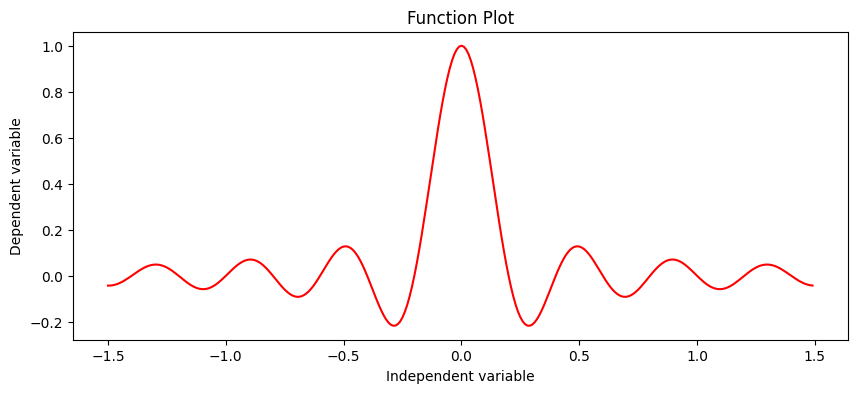

In [5]:
import torch
import matplotlib.pyplot as plt

x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

x_np, y_np = x.numpy(), y.numpy()

plt.figure(figsize=(10,4))
plt.plot(x_np, y_np, color="red")
plt.title('Function Plot')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()


In [6]:
class Model1(nn.Module):
    def __init__(self,):
        super(Model1, self).__init__()
        self.linear1 = nn.Linear(1, 5)
        self.linear2 = nn.Linear(5, 10)
        self.linear3 = nn.Linear(10, 10)
        self.linear4 = nn.Linear(10, 10)
        self.linear5 = nn.Linear(10, 10)
        self.linear6 = nn.Linear(10, 10)
        self.linear7 = nn.Linear(10, 5)
        self.predict = nn.Linear(5, 1)

    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))
        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = nn.functional.leaky_relu(self.linear4(x))
        x = nn.functional.leaky_relu(self.linear5(x))
        x = nn.functional.leaky_relu(self.linear6(x))
        x = nn.functional.leaky_relu(self.linear7(x))

        x = self.predict(x)
        return x

model_1 = Model1()

In [7]:
optimizer = torch.optim.Adam(model_1.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_1.parameters())
print(pytorch_total_params)
m1_epoch_arr, m1_loss_arr, m1_prediction, m1_grad_arr = model_train(model_1, x, y)

571
epoch: 100, loss = 0.0774
epoch: 200, loss = 0.0607
epoch: 300, loss = 0.0524
epoch: 400, loss = 0.0387
epoch: 500, loss = 0.0048
epoch: 600, loss = 0.0031
epoch: 700, loss = 0.0023
epoch: 800, loss = 0.0023
epoch: 900, loss = 0.0022
epoch: 1000, loss = 0.0022
epoch: 1100, loss = 0.0022
epoch: 1200, loss = 0.0022
epoch: 1300, loss = 0.0022
epoch: 1400, loss = 0.0022
epoch: 1500, loss = 0.0022
epoch: 1600, loss = 0.0022
epoch: 1700, loss = 0.0022
epoch: 1800, loss = 0.0022
epoch: 1900, loss = 0.0022
epoch: 2000, loss = 0.0021
Max Epoch Reached


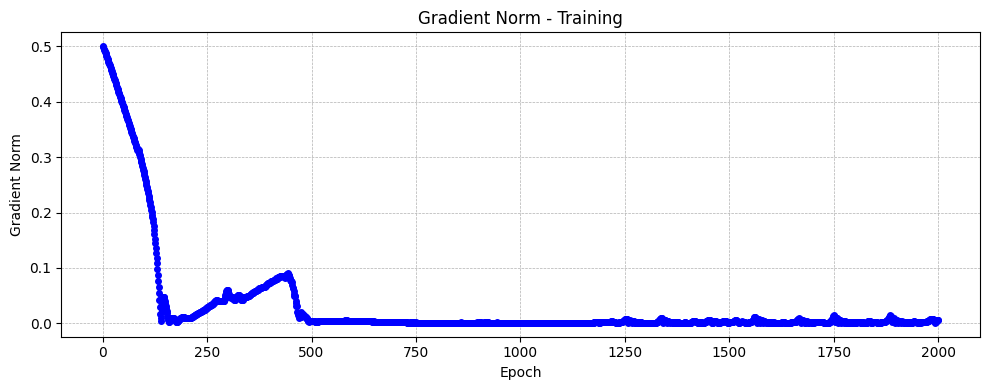

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(m1_epoch_arr, m1_grad_arr, marker='o', linestyle='-', color='b', markersize=4)
plt.title('Gradient Norm - Training')
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

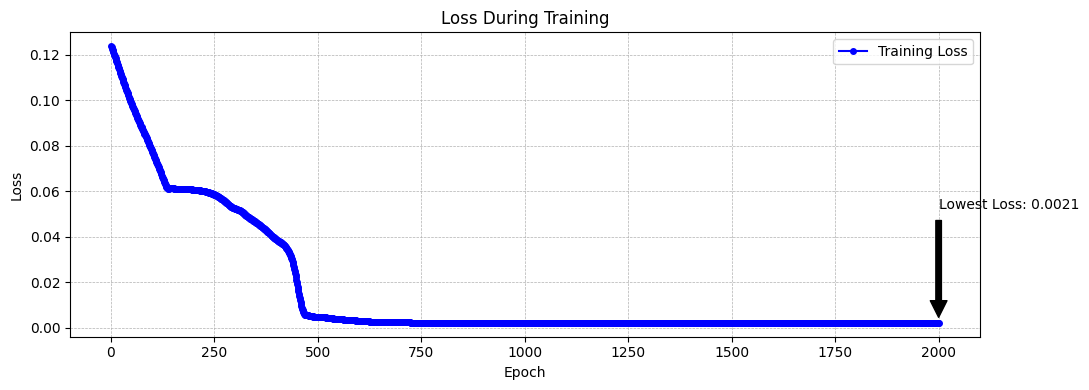

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(m1_epoch_arr, m1_loss_arr, marker='o', linestyle='-', color='blue', markersize=4, label='Training Loss')
plt.title('Loss During Training')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend()

min_loss_epoch = m1_epoch_arr[m1_loss_arr.index(min(m1_loss_arr))]
min_loss_value = min(m1_loss_arr)
plt.annotate(f'Lowest Loss: {min_loss_value:.4f}', xy=(min_loss_epoch, min_loss_value), xytext=(min_loss_epoch, min_loss_value+0.05),
             arrowprops=dict(facecolor='black', shrink=0.05),)

plt.show()

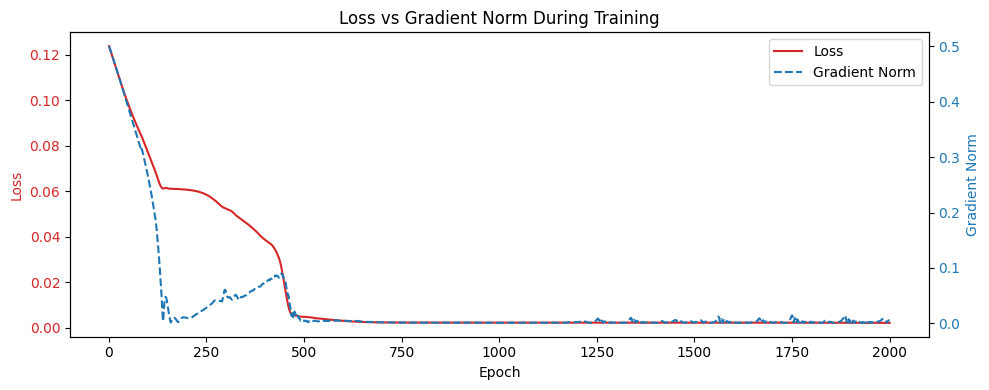

In [10]:
fig, ax1 = plt.subplots(figsize=(10, 4))

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(m1_epoch_arr, m1_loss_arr, color=color, label='Loss')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Gradient Norm', color=color)
ax2.plot(m1_epoch_arr, m1_grad_arr, color=color, label='Gradient Norm', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Loss vs Gradient Norm During Training')
fig.tight_layout()

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show()
